# Red Neuronal (?) Inception V3 con Tensor.flow Keras

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import os
import keras
from keras.models import Sequential
from keras import backend as K
from keras.layers import Input
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import csv



In [8]:
cumulos_folder_shell1=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\shell1\cumulos"
nocumulos_folder_shell1=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\shell1\no-cumulos"

cumulos_folder_shell2=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\shell2\cumulos"
nocumulos_folder_shell2=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\shell2\no-cumulos"

shell1=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\shell1"
shell2=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\muestra_entrenamiento\shell2"

clasificar_shell1=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\data_v2_diagramas\shell1\prueba"
clasificar_shell2=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\data_v2_diagramas\shell2\prueba"

In [60]:
# Paths to the datasets
train_data_dir = shell1 # Cambiar a shell1 o shell2 segun corresponda

#train_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)
# Data augmentation and preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False
)

# Load training data from 'clusters' and 'not_clusters'
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode="rgb",
    target_size=(253, 385),  # InceptionV3 requires 299x299 input size
    batch_size=32,
    class_mode='binary',  # Binary classification: "clusters" vs "not_clusters"
    classes=['cumulos', 'no-cumulos'],  # Map directories to labels
    shuffle=True
)


Found 10272 images belonging to 2 classes.


In [61]:

# Data preprocessing for the unknown folder (without augmentation)
#test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_data_dir=clasificar_shell1

#test_datagen = ImageDataGenerator(preprocessing_function=preprocess_image)

test_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Rescale pixel values to [0, 1]
    rotation_range=5,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    #dtype=tf.float32
)

unknown_generator = test_datagen.flow_from_directory(
    test_data_dir, 
    target_size=(253, 385),
    batch_size=1,
    color_mode="rgb",
    class_mode=None,  # No labels for unknown data
    #shuffle=False  # Keep the order of files
)


Found 37 images belonging to 1 classes.


In [62]:
def get_model():
  base_model = InceptionV3(input_shape = (253,385,3), weights='imagenet', include_top=False)
  x = base_model.output
  x = keras.layers.GlobalAveragePooling2D()(x)
  x = keras.layers.Dense(1024, activation='relu')(x)
  x = keras.layers.BatchNormalization()(x)
  predictions = keras.layers.Dense(1, activation='sigmoid')(x)
  model = keras.models.Model(inputs=base_model.input, outputs=predictions)

  for layer in base_model.layers:
    layer.trainable = False
  
  model.summary()
  return model

# Compile the model

In [63]:
model = get_model()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 253, 385,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_376 (Conv2D) │ (None, 126, 192,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 126, 192,  │         96 │ conv2d_376[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_376      │ (None, 126, 192,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_377 (Conv2D) │ (None, 124, 190,  │      9,216 │ activation_376[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 124, 190,  │         96 │ conv2d_377[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_377      │ (None, 124, 190,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_378 (Conv2D) │ (None, 124, 190,  │     18,432 │ activation_377[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 124, 190,  │        192 │ conv2d_378[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_378      │ (None, 124, 190,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 61, 94,    │          0 │ activation_378[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_379 (Conv2D) │ (None, 61, 94,    │      5,120 │ max_pooling2d_16… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 94,    │        240 │ conv2d_379[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_379      │ (None, 61, 94,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_380 (Conv2D) │ (None, 59, 92,    │    138,240 │ activation_379[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 59, 92,    │        576 │ conv2d_380[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_380      │ (None, 59, 92,    │          0 │ batch_normalizat

 Total params: 23,906,081 (91.19 MB)

 Trainable params: 2,101,249 (8.02 MB)

 Non-trainable params: 21,804,832 (83.18 MB)

In [64]:
# Compile the model
#model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',    metrics=['accuracy'])
model.compile(keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [65]:

model.fit(train_generator,epochs=3)
#model.fit(
#    train_generator,
#    epochs=2,  # Adjust based on your dataset
    #steps_per_epoch=train_generator.samples // train_generator.batch_size
#)

c:\Users\juang\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
321/321 ━━━━━━━━━━━━━━━━━━━━ 597s 2s/step - accuracy: 0.8894 - loss: 0.3370
Epoch 2/3
321/321 ━━━━━━━━━━━━━━━━━━━━ 645s 2s/step - accuracy: 0.9139 - loss: 0.2085
Epoch 3/3
321/321 ━━━━━━━━━━━━━━━━━━━━ 625s 2s/step - accuracy: 0.9195 - loss: 0.2063


In [67]:
#img_path =  r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\data_v2_diagramas\shell1P\dmwidmw\Alessi_91_3.png"
#img_path = r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\data_v2_diagramas\shell1\prueba\Q8_cluster_100.csv.png"
resultados={}
folder_path = r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\data_v2_diagramas\shell1\prueba"
for file in os.listdir(folder_path):
    img_path=os.path.join(folder_path,file)
    img = image.load_img(img_path, target_size=(253, 385))
 # Preprocessing the image
    x = image.img_to_array(img)
# x = np.true_divide(x, 255)
## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
#preds=np.argmax(preds, axis=1)

    print(file+"   :"+str(preds))
    resultados[file]=preds[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Q1_cluster_0.png   :[[0.8831104]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
Q1_cluster_1.csv.png   :[[0.37913823]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Q1_cluster_10.csv.png   :[[0.02116607]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Q1_cluster_11.csv.png   :[[0.50107104]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Q1_cluster_12.csv.png   :[[0.15225321]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Q1_cluster_13.csv.png   :[[0.06384222]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Q1_cluster_14.csv.png   :[[0.8698764]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Q1_cluster_15.csv.png   :[[0.16384886]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Q1_cluster_16.csv.png   :[[0.06640936]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Q1_cluster_17.csv.png   :[[0.93517756]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Q1_cluster_18.csv.png   :[[0.8182127]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Q1_cluster_19.csv.png   :[[0.77607334]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Q1_cluster_2.csv.png   :[

In [68]:
resultados

{'Q1_cluster_0.png': 0.8831104,
 'Q1_cluster_1.csv.png': 0.37913823,
 'Q1_cluster_10.csv.png': 0.02116607,
 'Q1_cluster_11.csv.png': 0.50107104,
 'Q1_cluster_12.csv.png': 0.15225321,
 'Q1_cluster_13.csv.png': 0.06384222,
 'Q1_cluster_14.csv.png': 0.8698764,
 'Q1_cluster_15.csv.png': 0.16384886,
 'Q1_cluster_16.csv.png': 0.066409364,
 'Q1_cluster_17.csv.png': 0.93517756,
 'Q1_cluster_18.csv.png': 0.8182127,
 'Q1_cluster_19.csv.png': 0.77607334,
 'Q1_cluster_2.csv.png': 0.020591395,
 'Q1_cluster_20.csv.png': 0.968394,
 'Q1_cluster_21.csv.png': 0.9551473,
 'Q1_cluster_22.csv.png': 0.9605628,
 'Q1_cluster_23.csv.png': 0.9426279,
 'Q1_cluster_24.csv.png': 0.857631,
 'Q1_cluster_25.csv.png': 0.9879325,
 'Q1_cluster_26.csv.png': 0.9524755,
 'Q1_cluster_27.csv.png': 0.9920163,
 'Q1_cluster_28.csv.png': 0.99390537,
 'Q1_cluster_29.csv.png': 0.9131213,
 'Q1_cluster_3.csv.png': 0.9960502,
 'Q1_cluster_30.csv.png': 0.9869677,
 'Q1_cluster_31.csv.png': 0.98206466,
 'Q1_cluster_32.csv.png': 0.960975

In [ ]:
cumulos_resultados={}
campo_resultados={}
llaves=resultados.keys()
for x in llaves:
    valor=resultados[x]
    if valor <0.5:
        cumulos_resultados[x]=valor
    else:
        campo_resultados[x]=valor
        

In [ ]:
len(cumulos_resultados), len(campo_resultados)

In [79]:
modelo_path=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\modelo\modelo1\prueba.keras"
model.save(modelo_path,zipped=True)

In [ ]:
#NO CORRER
# Predict on the unknown images
predictions = model.predict(unknown_generator, steps=len(unknown_generator), verbose=1)

# Get the filenames of the unknown images
filenames = unknown_generator.filenames

# Output the filenames with their corresponding probabilities
for filename, prob in zip(filenames, predictions):
    print(f"{filename}: Probability of 'cluster' = {prob[0]:.4f}, Probability of 'not cluster' = {1 - prob[0]:.4f}")


### Cargar Modelo

In [1]:
modelo_path_new=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\modelo\modelo1\prueba.keras"

In [4]:
new_model = tf.keras.models.load_model(modelo_path_new)

# Check its architecture
new_model.summary()

c:\Users\juang\anaconda3\lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 253, 385,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_376 (Conv2D) │ (None, 126, 192,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 126, 192,  │         96 │ conv2d_376[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_376      │ (None, 126, 192,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_377 (Conv2D) │ (None, 124, 190,  │      9,216 │ activation_376[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 124, 190,  │         96 │ conv2d_377[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_377      │ (None, 124, 190,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_378 (Conv2D) │ (None, 124, 190,  │     18,432 │ activation_377[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 124, 190,  │        192 │ conv2d_378[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_378      │ (None, 124, 190,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 61, 94,    │          0 │ activation_378[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_379 (Conv2D) │ (None, 61, 94,    │      5,120 │ max_pooling2d_16… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 61, 94,    │        240 │ conv2d_379[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_379      │ (None, 61, 94,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_380 (Conv2D) │ (None, 59, 92,    │    138,240 │ activation_379[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 59, 92,    │        576 │ conv2d_380[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_380      │ (None, 59, 92,    │          0 │ batch_normalizat

 Total params: 26,007,332 (99.21 MB)

 Trainable params: 2,101,249 (8.02 MB)

 Non-trainable params: 21,804,832 (83.18 MB)

 Optimizer params: 2,101,251 (8.02 MB)

In [5]:
resultados={}
folder_path = r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\data_v2_diagramas\shell1\prueba"
for file in os.listdir(folder_path):
    img_path=os.path.join(folder_path,file)
    img = image.load_img(img_path, target_size=(253, 385))
 # Preprocessing the image
    x = image.img_to_array(img)
# x = np.true_divide(x, 255)
## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
    preds = new_model.predict(x)
#preds=np.argmax(preds, axis=1)

    print(file+"   :"+str(preds))
    resultados[file]=preds[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Q1_cluster_0.png   :[[0.8831104]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Q1_cluster_1.csv.png   :[[0.37913823]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Q1_cluster_10.csv.png   :[[0.02116607]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Q1_cluster_11.csv.png   :[[0.50107104]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Q1_cluster_12.csv.png   :[[0.15225321]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Q1_cluster_13.csv.png   :[[0.06384222]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Q1_cluster_14.csv.png   :[[0.8698764]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Q1_cluster_15.csv.png   :[[0.16384886]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Q1_cluster_16.csv.png   :[[0.06640936]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Q1_cluster_17.csv.png   :[[0.93517756]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Q1_cluster_18.csv.png   :[[0.8182127]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Q1_cluster_19.csv.png   :[[0.77607334]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
Q1_cluster_2.csv.png   :[

In [6]:
cumulos_resultados={}
campo_resultados={}
llaves=resultados.keys()
for x in llaves:
    valor=resultados[x]
    if valor <0.5:
        cumulos_resultados[x]=valor
    else:
        campo_resultados[x]=valor

len(cumulos_resultados), len(campo_resultados)

(76, 600)

In [ ]:
# Folder path and list of image names
folder_path = clasificar_shell1  # Replace with your folder path
image_names = campo_resultados.keys()  # Replace with your list of image names
verificacion_campo={}
for image_name in image_names:
    # Full path to the image
    image_path = os.path.join(folder_path, image_name)
    
    # Load and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('on')  # Hide axis for better viewing
    plt.title(image_name+" es Campo: 1:Si, 2:No")
    plt.show()
    
    # Wait for user input
    while True:
        user_input = input(f"Enter True or False for {image_name}: ")
        if user_input in ["1", "2"]:
            if user_input=="1":
                user_input=True
            elif user_input=="2":
                user_input=False
            verificacion_campo[image_name]=bool(user_input)
            break  # Proceed to the next image if input is valid
        else:
            print("Please enter either 'True' or 'False'.")

print("All images have been displayed.")


In [13]:
falsos_positivos=0
for x in verificacion_campo.keys():
    if verificacion_campo[x]==False:
        falsos_positivos+=1

In [14]:
falsos_positivos

14

In [ ]:
# Folder path and list of image names
folder_path = clasificar_shell1  # Replace with your folder path
image_names = cumulos_resultados.keys()  # Replace with your list of image names
verificacion_cumulo={}
for image_name in image_names:
    # Full path to the image
    image_path = os.path.join(folder_path, image_name)
    
    # Load and display the image
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('on')  # Hide axis for better viewing
    plt.title(image_name+" es Cumulo: 1:Si, 2:No")
    plt.show()
    
    # Wait for user input
    while True:
        user_input = input(f"Enter True or False for {image_name}: ")
        if user_input in ["1", "2"]:
            if user_input=="1":
                user_input=True
            elif user_input=="2":
                user_input=False
            verificacion_cumulo[image_name]=bool(user_input)
            break  # Proceed to the next image if input is valid
        else:
            print("Please enter either 'True' or 'False'.")

print("All images have been displayed.")


In [17]:
falsos_positivos2=0
for x in verificacion_cumulo.keys():
    if verificacion_cumulo[x]==False:
        falsos_positivos2+=1

In [18]:
falsos_positivos2

24

In [23]:
#carpeta=r"C:\Users\juang\Documents\Tareas JD\Universidad\Materias\8 Semestre\Proyecto Teorico\Proyecto Teorico 20242\Gaia-DR3-Proyecto-Teorico-20242\resultado verificacion"
with open("veri_cumulo.csv", "w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Key", "Value"])  # Write header
    for key, value in verificacion_cumulo.items():
        writer.writerow([key, value])


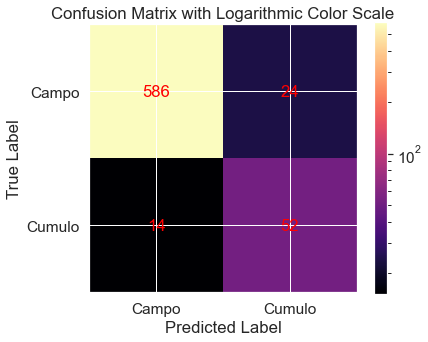

In [41]:
import matplotlib.colors as mcolors

# Confusion matrix array
array = np.array([[586, 24], [14, 52]])

# Define labels for rows and columns
labels = ["Campo", "Cumulo"]

# Create the plot with a logarithmic color scale
plt.figure(figsize=(6, 5))
norm = mcolors.LogNorm(vmin=array.min() + 1, vmax=array.max())  # Log scale, vmin is adjusted to avoid log(0)
plt.imshow(array, interpolation="nearest", cmap="magma", norm=norm)
plt.colorbar()

# Add labels to x and y axes
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix with Logarithmic Color Scale")

# Add text annotations
for i in range(array.shape[0]):
    for j in range(array.shape[1]):
        plt.text(j, i, f"{array[i, j]}", ha="center", va="center", color="red")

plt.show()


